#### CSE1015 - Lab 8 - Comparison of Different Clustering Algorithms

Yajus Kishor
20BAI1318

In [39]:
import matplotlib.pyplot as plt
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [40]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [42]:
pca_df = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])

In [43]:
pca_df.head()

,PC1,PC2,PC3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [44]:
# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)

KMeans(n_clusters=3)

C:\Users\haves\AppData\Local\Temp/ipykernel_32384/4180565301.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


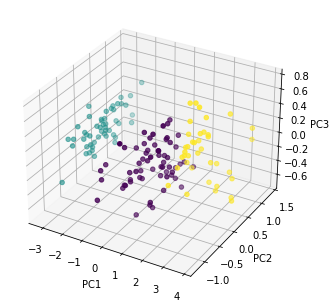

In [45]:
# Visualizing the clusters in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=kmeans.labels_)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [46]:
# Silhouette Coefficient
from sklearn.metrics import silhouette_score, accuracy_score
score = silhouette_score(pca_df, kmeans.labels_)
print(score, accuracy_score(iris.target, kmeans.labels_))

0.5630437008750582 0.24


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [102.5, 102.5, 133.75, 133.75],
  [70.0, 70.0, 118.125, 118.125],
  [21.25, 21.25, 94.0625, 94.0625],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [175.0, 175.0, 201.25, 201.25],
  [165.0, 165.0, 188.125, 188.125],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [240.0, 240.0, 267.5, 267.5],
  [176.5625, 176.5625, 253.75, 253.75],
  [57.65625, 57.65625, 215.15625, 215.15625]],
 'dcoord': [[0.0, 0.7327604696961963, 0.7327604696961963,

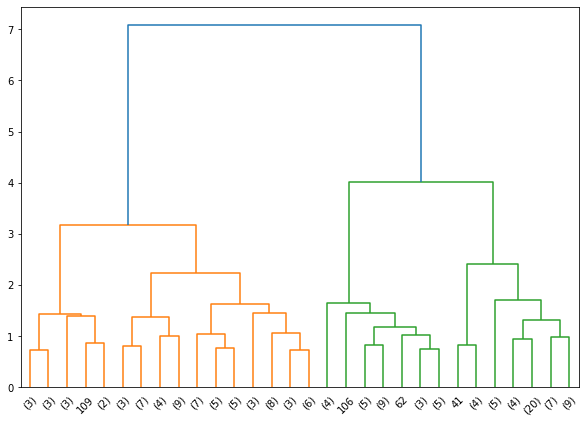

In [48]:
# Heirarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(pca_df, method='complete')

plt.figure(figsize=(10, 7))
dendrogram(
	linkage_matrix,
	truncate_mode='lastp'
)

In [49]:
# K-Medoids Clustering
target = iris.target_names
labels = iris.target

# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# PCA Transformation
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data=principalComponents,
                     columns=['principal component 1', 'principal component 2', 'principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k = 3


def init_medoids(X, k):
	from numpy.random import choice
	from numpy.random import seed

	seed(1)
	samples = choice(len(X), size=k, replace=False)
	return X[samples, :]


medoids_initial = init_medoids(datapoints, 3)


def compute_d_p(X, medoids, p):
	m = len(X)
	medoids_shape = medoids.shape
	# If a 1-D array is provided,
	# it will be reshaped to a single row 2-D array
	if len(medoids_shape) == 1:
		medoids = medoids.reshape((1, len(medoids)))
	k = len(medoids)

	S = np.empty((m, k))

	for i in range(m):
		d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
		S[i, :] = d_i ** p

	return S


S = compute_d_p(datapoints, medoids_initial, 2)


def assign_labels(S):
	return np.argmin(S, axis=1)


labels = assign_labels(S)


def update_medoids(X, medoids, p):
	S = compute_d_p(datapoints, medoids, p)
	labels = assign_labels(S)

	out_medoids = medoids

	for i in set(labels):

		avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

		cluster_points = datapoints[labels == i]

		for datap in cluster_points:
			new_medoid = datap
			new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))

			if new_dissimilarity < avg_dissimilarity:
				avg_dissimilarity = new_dissimilarity

				out_medoids[i] = datap

	return out_medoids


def has_converged(old_medoids, medoids):
	return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])


# Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
	if starting_medoids is None:
		medoids = init_medoids(X, k)
	else:
		medoids = starting_medoids

	converged = False
	labels = np.zeros(len(X))
	i = 1
	while (not converged) and (i <= max_steps):
		old_medoids = medoids.copy()

		S = compute_d_p(X, medoids, p)

		labels = assign_labels(S)

		medoids = update_medoids(X, medoids, p)

		converged = has_converged(old_medoids, medoids)
		i += 1
	return (medoids, labels)


results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]


# Count
def mark_matches(a, b, exact=False):
	assert a.shape == b.shape
	a_int = a.astype(dtype=int)
	b_int = b.astype(dtype=int)
	all_axes = tuple(range(len(a.shape)))
	assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
	assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()

	exact_matches = (a_int == b_int)
	if exact:
		return exact_matches

	assert exact == False
	num_exact_matches = np.sum(exact_matches)
	if (2 * num_exact_matches) >= np.prod(a.shape):
		return exact_matches
	return exact_matches == False  # Invert


def count_matches(a, b, exact=False):

	matches = mark_matches(a, b, exact=exact)
	return np.sum(matches)


n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matches out of",
      len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

142 matches out of 150 data points (~ 94.7%)
